In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [23]:
df = pd.read_csv('C:/Users/yifen/OneDrive - The University of Chicago/Research/_Data/Broader_Screen_Revised_Viability.csv')
df['group'] = ['primary'] * 2674 + ['broader'] * 720 * 4
df['iteration'] = ['primary'] * 2674 + ['1'] * 720 + ['2'] * 720 + ['3'] * 720 + ['4'] * 720
df = df[(df['Viability Mask 1'] >= 70) & (df['Viability Mask 2'] >= 70)]
df = df.drop_duplicates('SMILES')
df.index = range(len(df))
df

,Catalog,SMILES,Viability Mask 1,Viability Mask 2,LPS Abs,LPS Abs Std,LPS Lum,LPS Lum Std,MPLA Abs,MPLA Abs Std,...,cGAMP Abs,cGAMP Abs Std,cGAMP Lum,cGAMP Lum Std,LMCpG Abs,LMCpG Abs Std,LMcGAMP Lum,LMcGAMP Lum Std,group,iteration
0,S1430,COc1ccc(C2CNC(=O)C2)cc1OC1CCCC1,89.651240,80.165400,1.536931,0.205333,0.987337,0.165441,1.148107,0.247201,...,1.420875,0.243884,1.031188,0.100721,1.648535,0.197174,0.934031,0.200480,primary,primary
1,S1431,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)...,97.602710,89.566690,1.332227,0.175862,0.891944,0.251661,0.851595,0.208572,...,1.162379,0.176028,1.047966,0.083725,1.155171,0.160423,0.900285,0.242862,primary,primary
2,S1432,CNS(=O)(=O)Cc1ccc2[nH]cc(CCN(C)C)c2c1.O=C(O)CC...,96.759640,90.507330,1.107818,0.146291,1.028605,0.164170,0.927301,0.231975,...,1.176198,0.177328,1.002656,0.066326,1.021598,0.161885,0.950575,0.173304,primary,primary
3,S1437,Cl.Clc1ccc2nsnc2c1NC1=NCCN1,92.913500,90.182750,0.928647,0.154019,1.051328,0.158262,0.880996,0.167440,...,1.083389,0.172392,0.945324,0.071134,0.919484,0.136459,0.914305,0.193029,primary,primary
4,S1438,CC1(C)OC2COC3(COS(N)(=O)=O)OC(C)(C)OC3C2O1,94.191090,93.431560,0.897733,0.122832,1.036929,0.184212,0.824293,0.194898,...,1.113826,0.167963,0.946117,0.044879,0.910271,0.139046,0.912105,0.224505,primary,primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,27374,CC(C)(C)n1cnc2cc(N=Cc3ccc(Cl)cc3)ccc21,100.221862,100.054781,1.006525,0.122551,0.804812,0.048437,1.396672,0.054982,...,1.042664,0.205587,0.888231,0.059418,1.204851,0.110445,0.896298,0.075202,broader,4
3556,26799,Br.CCCCn1c(=N)n(CC(=O)OC)c2ccccc21,100.528668,99.352576,0.956586,0.080515,1.001644,0.055440,1.051757,0.059124,...,0.955518,0.139085,0.955432,0.054814,1.045721,0.082438,1.034215,0.095424,broader,4
3557,27999,COc1ccc(C=NNC(=O)CSc2nnc(-c3ccccc3)n2-c2ccccc2...,100.896436,98.336247,1.142430,0.074061,0.958079,0.056154,1.085077,0.044989,...,0.985421,0.140360,0.844584,0.058798,1.124061,0.072496,0.935140,0.064302,broader,4
3558,28078,NS(=O)(=O)c1ccc2c(c1)C1C=CCC1C(C(=O)O)N2,100.808593,98.680276,0.991677,0.145665,0.930955,0.054687,1.006768,0.074656,...,0.875279,0.128811,0.800125,0.043354,0.861354,0.098565,0.914258,0.065500,broader,4


## Comparison between Primary screen and Broader screen

In [24]:
def plotDistribution(ax, Agn, reading, df, title, kind='group', swarmsize=1, yscale='linear', if_violin=False, if_topPerformer=True):

    # ax.set_yscale(yscale)
    if if_violin:
        ax = sns.violinplot(ax=ax, x=kind, y=f'{Agn} {reading}', data=df, inner='box')
    ax = sns.stripplot(ax=ax, x=kind, y=f'{Agn} {reading}', data=df, size=swarmsize)
    ax.set_title('Specialists Modulating ' + title, fontsize=17.5)
    
    # return ax

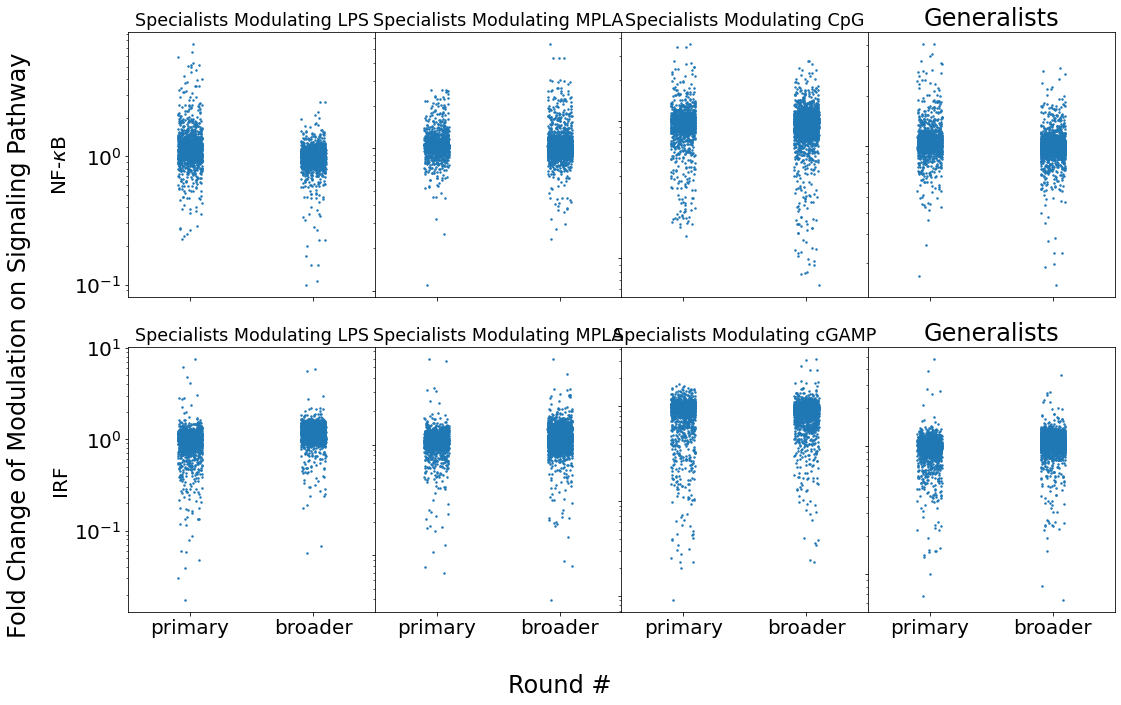

In [25]:
plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(nrows=2, ncols=4, wspace=0)
axs = gs.subplots(sharex=True)

Agonist_list = {'Abs': ['LPS', 'MPLA', 'CpG', 'LMCpG'], 'Lum': ['LPS', 'MPLA', 'cGAMP', 'LMcGAMP']}

for i, Agn in enumerate(Agonist_list['Abs']):
    ax = axs[0, i]
    ax.set_yscale('log')
    # ax.set_ylim(bottom=0.04, top=10.9)
    plotDistribution(ax, Agn, 'Abs', df, f'{Agn}', kind='group', swarmsize=2.5, yscale='log', if_violin=False, if_topPerformer=False)
    # ax.set_yticks([0.1, 0.3, 1.0, 3.0])
    # ax.set_yticklabels(['$10^{-1}$', '$3\\times10^{-1}$', '$10^0$', '$3\\times10^0$'])
    ax.label_outer()
    ax.set_xlabel('')
    handles, labels = ax.get_legend_handles_labels()
    if i == 3:
        ax.set_title('Generalists')
    
for i, Agn in enumerate(Agonist_list['Lum']):
    ax = axs[1, i]
    ax.set_yscale('log')
    # ax.set_ylim(bottom=0.04, top=10.9)
    plotDistribution(ax, Agn, 'Lum', df, f'{Agn}', kind='group', swarmsize=2.5, yscale='log', if_violin=False, if_topPerformer=False)
    # ax.set_yticks([1, 2, 3, 4, 6, 8])
    # ax.set_yticklabels(['  $10^0$', '  $2\\times10^0$', '', '  $4\\times10^0$', '', '  $8\\times10^0$'])
    ax.set_xlabel('')
    ax.label_outer()
    if i == 3:
        ax.set_title('Generalists')

axs[0,0].set_ylabel('NF-$\kappa$B')
axs[1,0].set_ylabel('IRF')

fig.supylabel('Fold Change of Modulation on Signaling Pathway')
fig.supxlabel('Round #')
plt.tight_layout()
# plt.savefig(f'topPerformer-ALL.svg')
# plt.savefig(f'topPerformer-ALL.png', dpi=300)
# plt.savefig('topPerformer-ALL-low-res.png', bbox_inches='tight')
plt.show()

## Making evolution plots

In [26]:
df = df[df['group'] == 'broader']
df

,Catalog,SMILES,Viability Mask 1,Viability Mask 2,LPS Abs,LPS Abs Std,LPS Lum,LPS Lum Std,MPLA Abs,MPLA Abs Std,...,cGAMP Abs,cGAMP Abs Std,cGAMP Lum,cGAMP Lum Std,LMCpG Abs,LMCpG Abs Std,LMcGAMP Lum,LMcGAMP Lum Std,group,iteration
1283,86846,CC1CC(C)CN(C(=O)CSc2nnc(Cc3ccccc3)o2)C1,98.571032,97.684376,1.057483,0.091516,0.943616,0.093208,0.878507,0.106120,...,1.047746,0.050156,1.012030,0.071503,0.951141,0.085595,0.938037,0.209076,broader,1
1284,86849,O=C(CSc1nnc(COc2ccc(Cl)cc2)o1)N1CCCc2ccccc21,102.055731,100.285971,1.122172,0.106291,0.822708,0.049758,0.852565,0.085912,...,0.952387,0.038143,0.884555,0.044088,0.952469,0.082949,0.857819,0.171165,broader,1
1285,87307,O=C(CCCn1c(=O)[nH]c2ccc(Br)cc2c1=O)NCC1CCCO1,102.555659,101.659498,1.050587,0.099050,1.037873,0.062692,0.931217,0.043361,...,0.970733,0.038682,0.956739,0.056751,0.982246,0.078074,0.978226,0.154221,broader,1
1286,87450,O=C(CSC1CCCCC1)Nc1cc(C(F)(F)F)ccc1Cl,101.013199,100.469088,1.379358,0.109126,2.202194,0.157303,1.388910,0.063141,...,1.025258,0.047873,1.450970,0.135030,1.094890,0.077395,1.708363,0.275552,broader,1
1287,87924,Cc1ccc2nc(C)c(NC(=O)c3ccc4ccccc4n3)c(=O)n2c1,99.464644,99.302052,1.029508,0.138659,1.023350,0.061465,0.823022,0.091422,...,0.862380,0.034275,0.793136,0.039782,0.879742,0.171434,0.972832,0.139045,broader,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,27374,CC(C)(C)n1cnc2cc(N=Cc3ccc(Cl)cc3)ccc21,100.221862,100.054781,1.006525,0.122551,0.804812,0.048437,1.396672,0.054982,...,1.042664,0.205587,0.888231,0.059418,1.204851,0.110445,0.896298,0.075202,broader,4
3556,26799,Br.CCCCn1c(=N)n(CC(=O)OC)c2ccccc21,100.528668,99.352576,0.956586,0.080515,1.001644,0.055440,1.051757,0.059124,...,0.955518,0.139085,0.955432,0.054814,1.045721,0.082438,1.034215,0.095424,broader,4
3557,27999,COc1ccc(C=NNC(=O)CSc2nnc(-c3ccccc3)n2-c2ccccc2...,100.896436,98.336247,1.142430,0.074061,0.958079,0.056154,1.085077,0.044989,...,0.985421,0.140360,0.844584,0.058798,1.124061,0.072496,0.935140,0.064302,broader,4
3558,28078,NS(=O)(=O)c1ccc2c(c1)C1C=CCC1C(C(=O)O)N2,100.808593,98.680276,0.991677,0.145665,0.930955,0.054687,1.006768,0.074656,...,0.875279,0.128811,0.800125,0.043354,0.861354,0.098565,0.914258,0.065500,broader,4


In [27]:
def getTopPerformer(Agn, reading, df, maxOrmin):

    topMeanList = []
    topStdList = []
    for i, iter in enumerate(['1', '2', '3', '4']):
        dfIter = df[df['iteration'] == iter]
        if maxOrmin == 'max':
            topMean = dfIter[f'{Agn} {reading}'].max()
            topId = dfIter[f'{Agn} {reading}'].argmax()
            topStd = dfIter.iloc[topId][f'{Agn} {reading} Std']
            if len(topMeanList) == 0 or topMean >= np.max(topMeanList):
                topMeanList.append(topMean)
                topStdList.append(topStd)
            else:
                topMeanList.append(topMeanList[i - 1])
                topStdList.append(topStdList[i - 1])
        elif maxOrmin == 'min':
            topMean = dfIter[f'{Agn} {reading}'].min()
            topId = dfIter[f'{Agn} {reading}'].argmin()
            topStd = dfIter.iloc[topId][f'{Agn} {reading} Std']
            if len(topMeanList) == 0 or topMean <= np.min(topMeanList):
                topMeanList.append(topMean)
                topStdList.append(topStd)
            else:
                topMeanList.append(topMeanList[i - 1])
                topStdList.append(topStdList[i - 1])
        else:
            print('value error: maxOrmin')

    return np.array(topMeanList), np.array(topStdList)


def plotTopPerformer(ax, Agn, reading, df, maxOrmin):

    X = np.arange(4)
    colormap = {'max': 'tab:orange', 'min': 'tab:purple'}
    wordmap = {'max': 'Enhancer', 'min': 'Inhibitor'}
    topMeanList, topStdList = getTopPerformer(Agn, reading, df, maxOrmin)
    ax.plot(X, topMeanList, color=colormap[maxOrmin], lw=2, label=f'Best {wordmap[maxOrmin]} So Far')
    ax.fill_between(X, topMeanList - topStdList, topMeanList + topStdList, color=colormap[maxOrmin], alpha=0.5, label=f'Std of Best {wordmap[maxOrmin]} So Far')

    # return ax

def plotDistribution(ax, Agn, reading, df, title, kind='group', swarmsize=1, yscale='linear', if_violin=False, if_topPerformer=True):

    # ax.set_yscale(yscale)
    # if if_violin:
    #     ax = sns.violinplot(ax=ax, x=kind, y=f'{Agn} {reading}', data=df, inner='box')
    ax.set_yscale('log', base=2)
    ax = sns.violinplot(ax=ax, x=kind, y=f'{Agn} {reading}', data=df, cut=0, scale='width')
    # ax.set_yscale('log')
    ax.set_title('Specialists - ' + title, fontsize=20)
    
    if if_topPerformer:
        plotTopPerformer(ax, Agn, reading, df, 'max')
        if reading == 'Abs':
            plotTopPerformer(ax, Agn, reading, df, 'min')
    
    # return ax

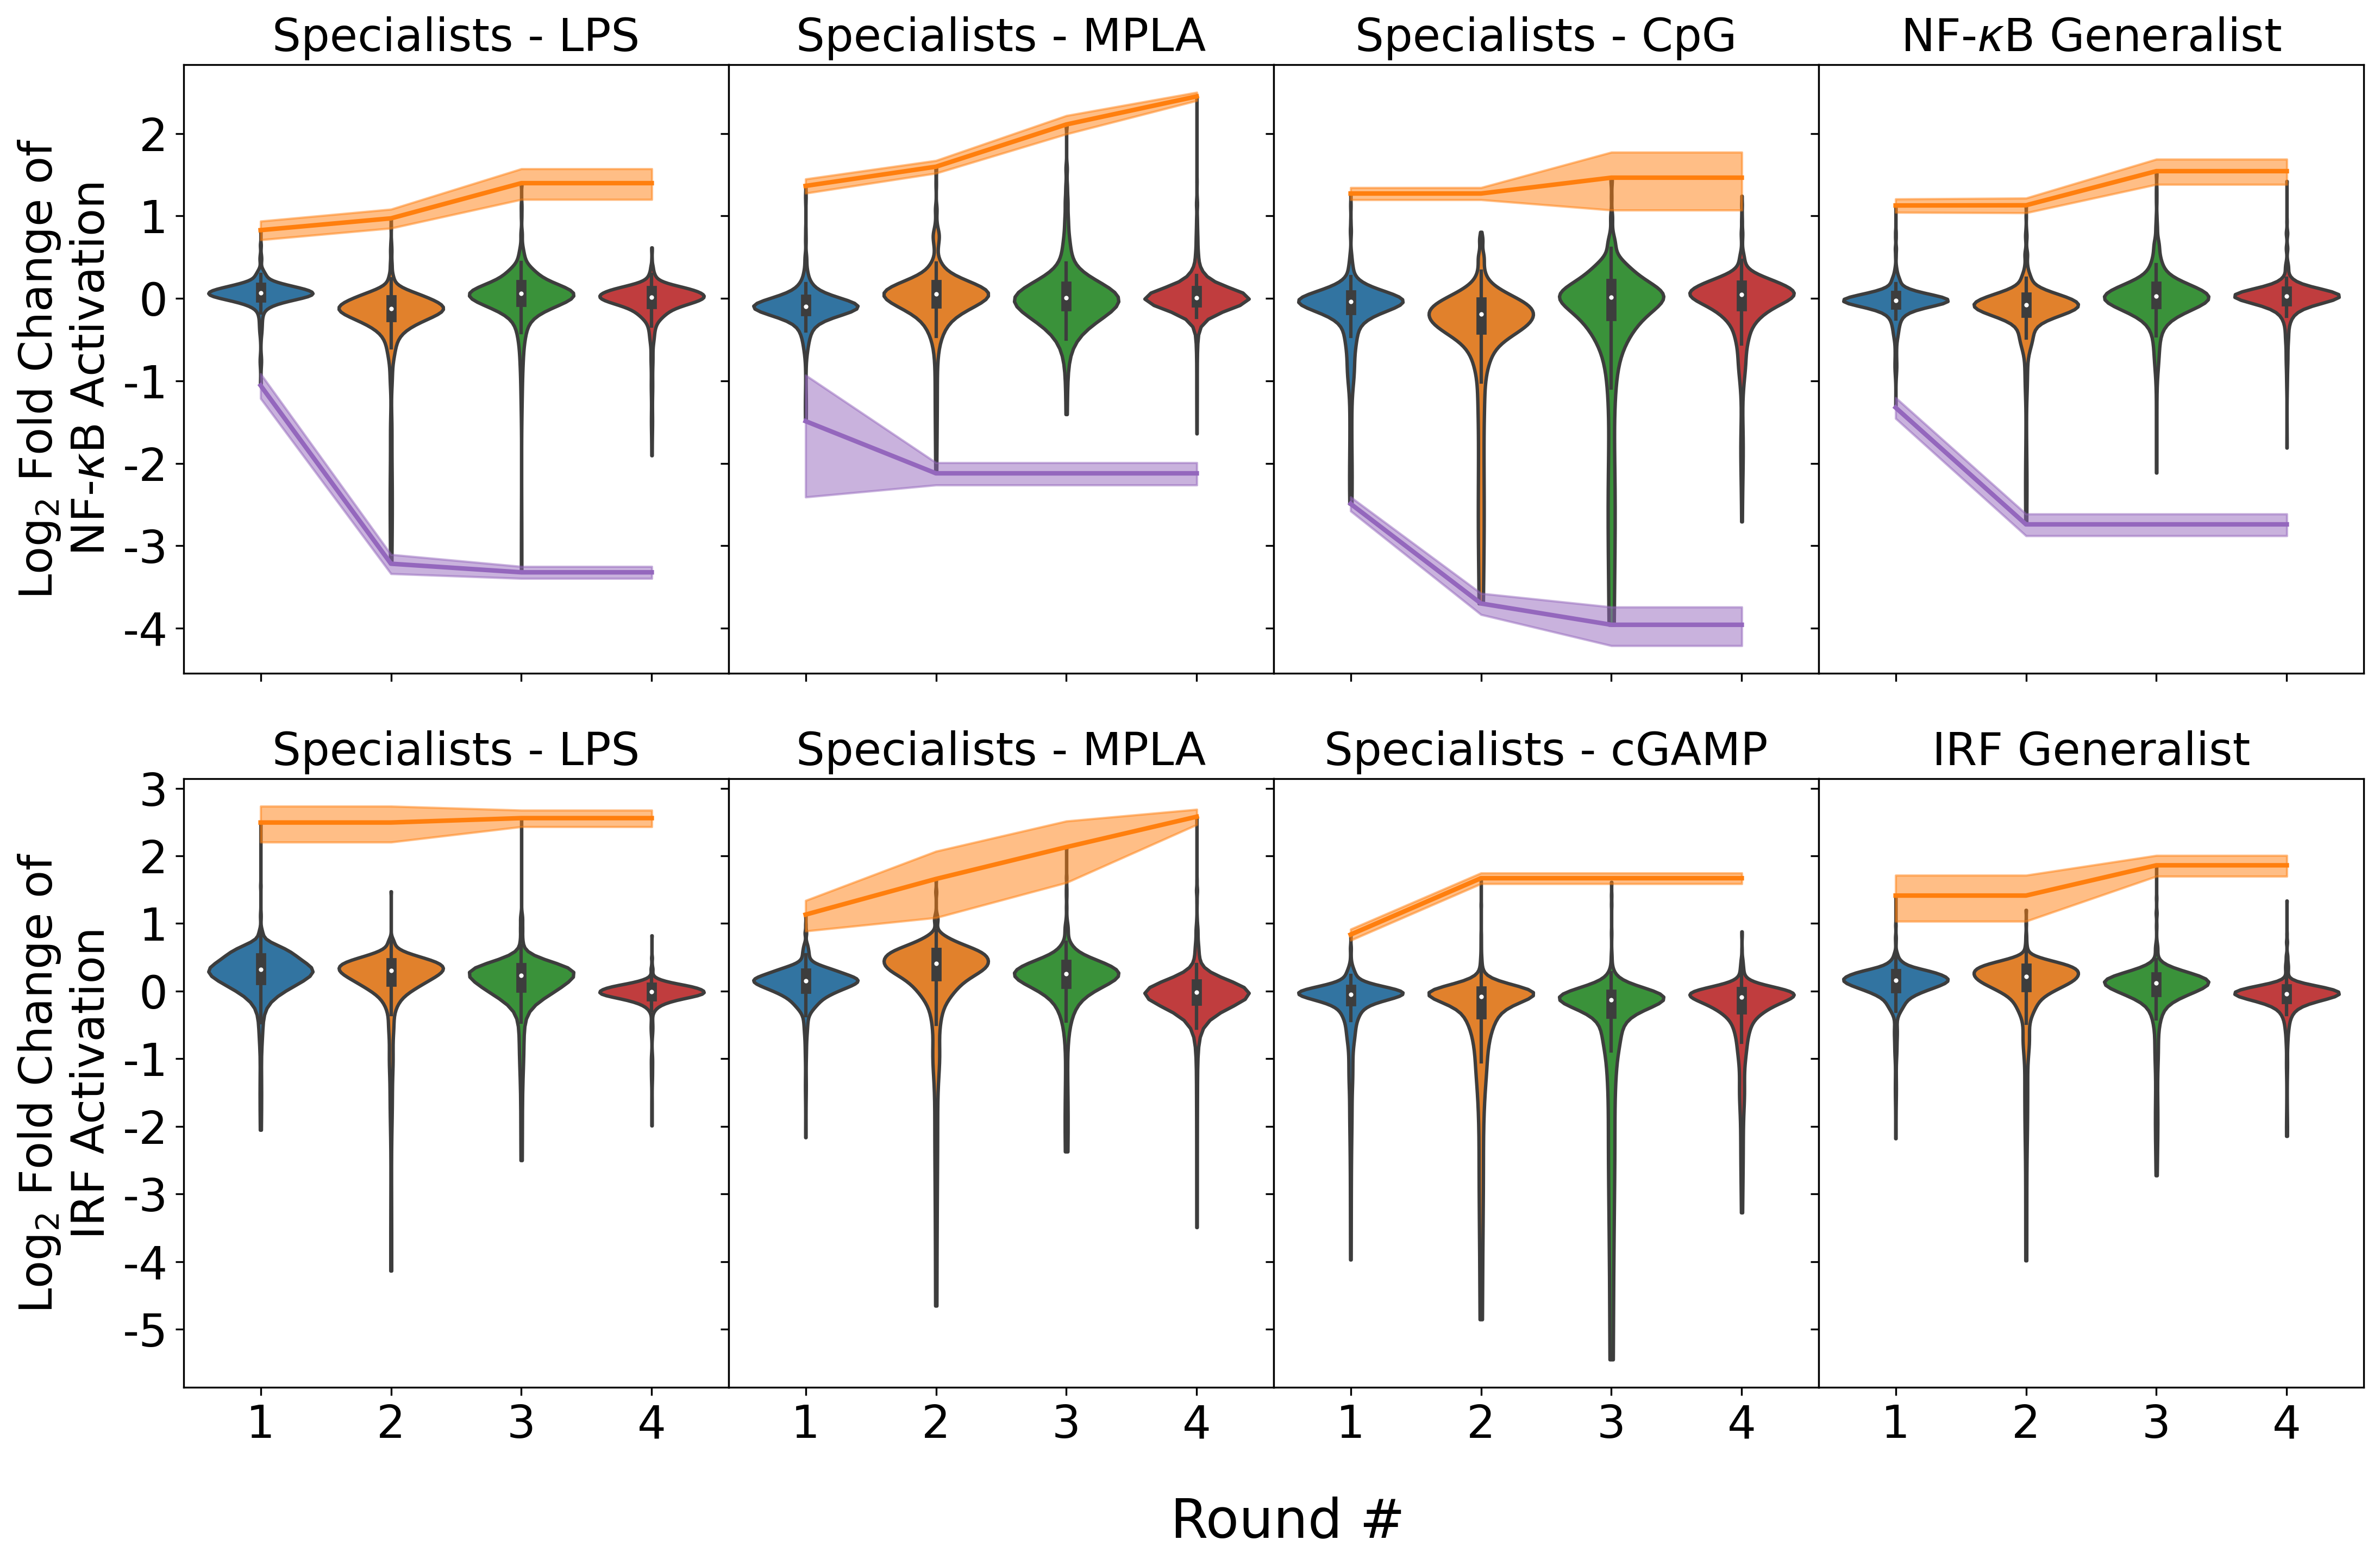

In [28]:
plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(15, 10), dpi=300)
gs = fig.add_gridspec(nrows=2, ncols=4, wspace=0)#, height_ratios=[2,1])
axs = gs.subplots(sharex='col', sharey='row')

Agonist_list = {'Abs': ['LPS', 'MPLA', 'CpG', 'LMCpG'], 'Lum': ['LPS', 'MPLA', 'cGAMP', 'LMcGAMP']}

for i, Agn in enumerate(Agonist_list['Abs']):
    ax = axs[0, i]
    # ax.set_yscale('log')
    # ax.set_ylim(bottom=0.04, top=10.9)
    plotDistribution(ax, Agn, 'Abs', df, f'{Agn}', kind='iteration', swarmsize=2.5, yscale='log', if_violin=False, if_topPerformer=True)
    powers = [-4,-3,-2,-1,0,1,2]
    ax.set_yticks([2 ** i for i in powers])
    ax.set_yticklabels(powers)
    ax.label_outer()
    ax.set_xlabel('')
    handles, labels = ax.get_legend_handles_labels()
    if i == 3:
        ax.set_title('NF-$\kappa$B Generalist', fontsize=20)
    
for i, Agn in enumerate(Agonist_list['Lum']):
    ax = axs[1, i]
    # ax.set_yscale('log')
    # ax.set_ylim(bottom=0.029, top=10.9)
    plotDistribution(ax, Agn, 'Lum', df, f'{Agn}', kind='iteration', swarmsize=2.5, yscale='log', if_violin=False, if_topPerformer=True)
    powers = [-5,-4,-3,-2,-1,0,1,2,3]
    ax.set_yticks([2 ** i for i in powers])
    ax.set_yticklabels(powers)
    ax.set_xlabel('')
    ax.label_outer()
    if i == 3:
        ax.set_title('IRF Generalist', fontsize=20)

axs[0,0].set_ylabel('Log$_2$ Fold Change of\nNF-$\kappa$B Activation')
axs[1,0].set_ylabel('Log$_2$ Fold Change of\nIRF Activation')
# axs[1,1].set_xlabel('Round #', loc='right')

# fig.supylabel('Fold Change of Modulation on Signaling Pathway', y=0.53)
fig.supxlabel('Round #', x=0.54, y=0.03)
plt.tight_layout()
# plt.savefig(f'topPerformer-ALL.svg')
# plt.savefig(f'topPerformer-ALL.png')
# plt.savefig('topPerformer-ALL-low-res.png', bbox_inches='tight')
# plt.savefig('topPerformer-ALL-high-res.png', bbox_inches='tight', dpi=300)
# plt.savefig('topPerformer-ALL.pdf', bbox_inches='tight')
plt.savefig('Fig2A.svg')
plt.show()